In [27]:
import pandas as pd
import os

import statistics
import numpy as np


In [28]:
NUMBER_OF_CLIENTS = 19
NUMBER_OF_ITERATIONS = 200
inputFolders = "result_unbalanced_epoch_1_rounds_200/"

In [29]:
file = inputFolders+"global_model_MLP_metrics.csv" # local_model_results_MLP_unbalanced_client_0_round_1

dataGeral = pd.read_csv(file)

dataGeral

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,-1,0,0.675560,awake,0.706267,0.824385,0.811969,0.818130,0.055286,0.528344,[[ 6151 18984][ 20637 89116]],6151.0,18984.0,20637.0,89116.0
1,-1,0,0.675560,asleep,0.706267,0.229598,0.244679,0.236898,0.055257,0.528328,[[ 89117 20636][ 18985 6150]],89117.0,20636.0,18985.0,6150.0
2,-1,0,0.675560,avg,0.706267,0.526991,0.528324,0.527514,0.055271,0.528336,NaN,NaN,NaN,NaN,NaN
3,-1,1,0.433390,awake,0.813660,0.813660,1.000000,0.897258,0.000000,0.500000,[[ 0 25135][ 0 109753]],0.0,25135.0,0.0,109753.0
4,-1,1,0.433390,asleep,0.813660,0.000000,0.000000,0.000000,0.000000,0.500000,[[ 109753 0][ 25135 0]],109753.0,0.0,25135.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-1,199,0.506233,asleep,0.834085,0.568190,0.456654,0.506353,0.408054,0.688588,[[ 101030 8723][ 13657 11478]],101030.0,8723.0,13657.0,11478.0
599,-1,199,0.506233,avg,0.834085,0.724555,0.688588,0.703319,0.408054,0.688588,NaN,NaN,NaN,NaN,NaN
600,-1,200,0.510126,awake,0.834885,0.880812,0.921806,0.900843,0.409205,0.688574,[[ 11445 13690][ 8582 101171]],11445.0,13690.0,8582.0,101171.0
601,-1,200,0.510126,asleep,0.834885,0.571479,0.455341,0.506842,0.409205,0.688574,[[ 101171 8582][ 13690 11445]],101171.0,8582.0,13690.0,11445.0


In [30]:
ss1 = dataGeral.loc[dataGeral['accuracy'] == dataGeral['accuracy'].max()]

ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
48,-1,16,0.430999,awake,0.844019,0.881716,0.933533,0.906885,0.429137,0.693343,[[ 11390 13745][ 7295 102458]],11390.0,13745.0,7295.0,102458.0
49,-1,16,0.430999,asleep,0.844019,0.609580,0.453153,0.519854,0.429137,0.693343,[[ 102458 7295][ 13745 11390]],102458.0,7295.0,13745.0,11390.0
50,-1,16,0.430999,avg,0.844019,0.745648,0.693343,0.713369,0.429137,0.693343,NaN,NaN,NaN,NaN,NaN


In [37]:
dataGeralFiltered = dataGeral[:(NUMBER_OF_ITERATIONS*3)+3]

dataGeralFiltered

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,-1,0,0.675560,awake,0.706267,0.824385,0.811969,0.818130,0.055286,0.528344,[[ 6151 18984][ 20637 89116]],6151.0,18984.0,20637.0,89116.0
1,-1,0,0.675560,asleep,0.706267,0.229598,0.244679,0.236898,0.055257,0.528328,[[ 89117 20636][ 18985 6150]],89117.0,20636.0,18985.0,6150.0
2,-1,0,0.675560,avg,0.706267,0.526991,0.528324,0.527514,0.055271,0.528336,NaN,NaN,NaN,NaN,NaN
3,-1,1,0.433390,awake,0.813660,0.813660,1.000000,0.897258,0.000000,0.500000,[[ 0 25135][ 0 109753]],0.0,25135.0,0.0,109753.0
4,-1,1,0.433390,asleep,0.813660,0.000000,0.000000,0.000000,0.000000,0.500000,[[ 109753 0][ 25135 0]],109753.0,0.0,25135.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-1,199,0.506233,asleep,0.834085,0.568190,0.456654,0.506353,0.408054,0.688588,[[ 101030 8723][ 13657 11478]],101030.0,8723.0,13657.0,11478.0
599,-1,199,0.506233,avg,0.834085,0.724555,0.688588,0.703319,0.408054,0.688588,NaN,NaN,NaN,NaN,NaN
600,-1,200,0.510126,awake,0.834885,0.880812,0.921806,0.900843,0.409205,0.688574,[[ 11445 13690][ 8582 101171]],11445.0,13690.0,8582.0,101171.0
601,-1,200,0.510126,asleep,0.834885,0.571479,0.455341,0.506842,0.409205,0.688574,[[ 101171 8582][ 13690 11445]],101171.0,8582.0,13690.0,11445.0


In [38]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dataGeralFiltered.loc[dataGeralFiltered['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
50,-1,16,0.430999,avg,0.844019,0.745648,0.693343,0.713369,0.429137,0.693343,NaN,NaN,NaN,NaN,NaN


In [39]:
dataGeralFiltered.loc[dataGeralFiltered['round'] == ss1['round'].max()]

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
48,-1,16,0.430999,awake,0.844019,0.881716,0.933533,0.906885,0.429137,0.693343,[[ 11390 13745][ 7295 102458]],11390.0,13745.0,7295.0,102458.0
49,-1,16,0.430999,asleep,0.844019,0.609580,0.453153,0.519854,0.429137,0.693343,[[ 102458 7295][ 13745 11390]],102458.0,7295.0,13745.0,11390.0
50,-1,16,0.430999,avg,0.844019,0.745648,0.693343,0.713369,0.429137,0.693343,NaN,NaN,NaN,NaN,NaN


In [40]:
allData = []

dataGeralFilteredAvg = dataGeralFiltered.loc[dataGeralFiltered['class'] == "avg"]

df = pd.DataFrame(columns=["round","min_accuracy","max_accuracy","global_accuracy","median","avg","sd","clients"])
# pegar acurática
for iterationI in range(1,NUMBER_OF_ITERATIONS+1):
    countCli = 0
    itetarionAccuracy = []
    for clientI in range(0,NUMBER_OF_CLIENTS):
        file = inputFolders+"global_MLP_client_"+str(clientI)+"_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
        #print(file)
        if(os.path.isfile(file)):
            dataF = pd.read_csv(file)
            accuracy = dataF['accuracy'][0]
            itetarionAccuracy.append(accuracy)
            countCli = countCli + 1
    # global accuracy local_model_results_MLP_client_0_round_0
    #file = inputFolders+"global_model_MLP_unbalanced_client_0_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
    #dataF = pd.read_csv(file)
    accuracySeries = dataGeralFilteredAvg[iterationI:(iterationI+1)]['accuracy']
    global_accuracy = accuracySeries.values[0]
    # global_model_MLP_unbalanced_client_0_round_1
    # iterationI
    minAcc = min(itetarionAccuracy)
    maxAcc = max(itetarionAccuracy)
    avgAcc = sum(itetarionAccuracy)/len(itetarionAccuracy)
    sd = np.std(itetarionAccuracy)
    median = statistics.median(itetarionAccuracy)

    # countCli
    print("Round ",iterationI,"Clients: ",countCli)
    ## add on dataframe
    values = [[iterationI,minAcc,maxAcc,global_accuracy,median,avgAcc,sd,countCli]]
    dfConc = pd.DataFrame(values,
                          columns=["round","min_accuracy","max_accuracy","global_accuracy","avg","median","sd","clients"])
    # append
    df = pd.concat([df,dfConc])

Round  1 Clients:  19
Round  2 Clients:  19
Round  3 Clients:  19
Round  4 Clients:  19
Round  5 Clients:  19
Round  6 Clients:  19
Round  7 Clients:  19
Round  8 Clients:  19
Round  9 Clients:  19
Round  10 Clients:  19
Round  11 Clients:  19
Round  12 Clients:  19
Round  13 Clients:  19
Round  14 Clients:  19
Round  15 Clients:  19
Round  16 Clients:  19
Round  17 Clients:  19
Round  18 Clients:  19
Round  19 Clients:  19
Round  20 Clients:  19
Round  21 Clients:  19
Round  22 Clients:  19
Round  23 Clients:  19
Round  24 Clients:  19
Round  25 Clients:  19
Round  26 Clients:  19
Round  27 Clients:  19
Round  28 Clients:  19
Round  29 Clients:  19
Round  30 Clients:  19
Round  31 Clients:  19
Round  32 Clients:  19
Round  33 Clients:  19
Round  34 Clients:  19
Round  35 Clients:  19
Round  36 Clients:  19
Round  37 Clients:  19
Round  38 Clients:  19
Round  39 Clients:  19
Round  40 Clients:  19
Round  41 Clients:  19
Round  42 Clients:  19
Round  43 Clients:  19
Round  44 Clients:  

In [41]:
itetarionAccuracy

[0.7961271573453532,
 0.6665381649961449,
 0.843017911155922,
 0.817782160014234,
 0.8253514026451575,
 0.7688156099875452,
 0.684449320918095,
 0.8289247375600498,
 0.7810628076626535,
 0.8449231955400036,
 0.7680890813119032,
 0.8307262321333254,
 0.8189386750489295,
 0.8040522507561829,
 0.833565624814661,
 0.4960189193997983,
 0.8211775695391732,
 0.8158398078405789,
 0.8199691595990748]

In [42]:
max(itetarionAccuracy)

0.8449231955400036

In [43]:
ss1 = dataGeral.loc[dataGeral['accuracy'] == dataGeral['accuracy'].max()]

ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
48,-1,16,0.430999,awake,0.844019,0.881716,0.933533,0.906885,0.429137,0.693343,[[ 11390 13745][ 7295 102458]],11390.0,13745.0,7295.0,102458.0
49,-1,16,0.430999,asleep,0.844019,0.609580,0.453153,0.519854,0.429137,0.693343,[[ 102458 7295][ 13745 11390]],102458.0,7295.0,13745.0,11390.0
50,-1,16,0.430999,avg,0.844019,0.745648,0.693343,0.713369,0.429137,0.693343,NaN,NaN,NaN,NaN,NaN


In [44]:
x = ss[iterationI:(iterationI+1)]['accuracy']
x.values[0]

0.8348852381234803

In [45]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,1,0.563386,0.816952,0.813660,0.791704,0.813660,0.058140,19
0,2,0.571852,0.817819,0.816500,0.791232,0.811310,0.056860,19
0,3,0.570192,0.816767,0.820711,0.788601,0.808152,0.055331,19
0,4,0.592113,0.823824,0.823505,0.787552,0.806973,0.053656,19
0,5,0.590927,0.822972,0.819376,0.786877,0.810213,0.056561,19
...,...,...,...,...,...,...,...,...
0,196,0.506761,0.845064,0.834856,0.781534,0.820266,0.082030,19
0,197,0.534184,0.844849,0.835664,0.782366,0.815973,0.078348,19
0,198,0.491356,0.846962,0.835048,0.784352,0.819042,0.083943,19
0,199,0.509534,0.842188,0.834085,0.783084,0.818472,0.081285,19


In [46]:
dfConc

,round,min_accuracy,max_accuracy,global_accuracy,avg,median,sd,clients
0,200,0.496019,0.844923,0.834885,0.817782,0.782388,0.082477,19


In [47]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,1,0.563386,0.816952,0.813660,0.791704,0.813660,0.058140,19
0,2,0.571852,0.817819,0.816500,0.791232,0.811310,0.056860,19
0,3,0.570192,0.816767,0.820711,0.788601,0.808152,0.055331,19
0,4,0.592113,0.823824,0.823505,0.787552,0.806973,0.053656,19
0,5,0.590927,0.822972,0.819376,0.786877,0.810213,0.056561,19
...,...,...,...,...,...,...,...,...
0,196,0.506761,0.845064,0.834856,0.781534,0.820266,0.082030,19
0,197,0.534184,0.844849,0.835664,0.782366,0.815973,0.078348,19
0,198,0.491356,0.846962,0.835048,0.784352,0.819042,0.083943,19
0,199,0.509534,0.842188,0.834085,0.783084,0.818472,0.081285,19


In [48]:
print("Global accuracy",df["global_accuracy"].max())

print("local accuracy",df["max_accuracy"].max())

Global accuracy 0.8440187414744084
local accuracy 0.84696192396655


In [49]:

from datetime import datetime
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


<AxesSubplot: xlabel='round'>

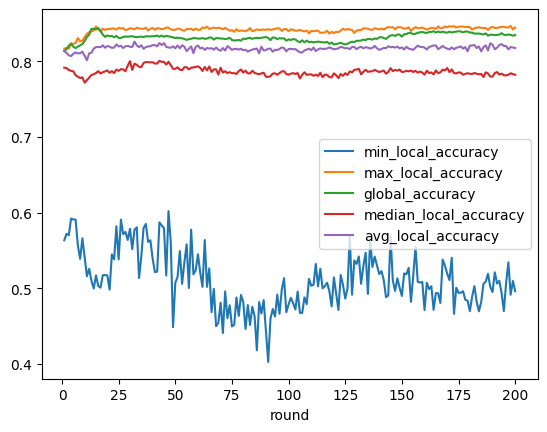

In [50]:
metrics = ["round","min_accuracy","max_accuracy","global_accuracy","median","avg"]
metrics = ["round","min_local_accuracy","max_local_accuracy","global_accuracy","median_local_accuracy","avg_local_accuracy"]

df['min_local_accuracy'] = df['min_accuracy']
df['max_local_accuracy'] = df['max_accuracy']
df['median_local_accuracy'] = df['median']
df['avg_local_accuracy'] = df['avg']

dfMetricsClass = df[metrics]
lines = dfMetricsClass.plot.line(x='round')

lines

In [51]:
lines.figure.savefig('metrics_flower_isabela_unbalanced_fix.pdf')